In [24]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

In [25]:
# 삼성전자, 테슬라 주식데이터 조회
yf.pdr_override() # pdr override해서 더 빨리 데이터 조회

In [36]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
tsla = pdr.get_data_yahoo('TSLA', start="2018-05-04")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
sec.tail() # close - 종가, Adj_close - 수정종가, Volume - 거래량

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-19,82300.0,82800.0,81000.0,82600.0,82600.0,25880879
2021-02-22,83800.0,84200.0,82200.0,82200.0,82200.0,25419886
2021-02-23,81200.0,82900.0,81100.0,82000.0,82000.0,20587314
2021-02-24,81800.0,83600.0,81300.0,82000.0,82000.0,26807651
2021-02-25,84000.0,85400.0,83000.0,85300.0,85300.0,33708989


In [38]:
tsla.tail() # 장 중이면 실시간 조회

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18904800
2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37011700
2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66397000
2021-02-24,711.849976,745.000000,694.169983,742.020020,742.020020,36677100
2021-02-25,726.150024,737.200012,707.179993,718.039978,718.039978,10919845


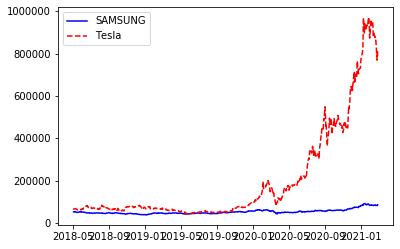

In [39]:
plt.plot(sec.index, sec.Close, 'b', label="SAMSUNG")
plt.plot(tsla.index, tsla.Close*1100, 'r--', label="Tesla") #대충 환율반영..
plt.legend(loc='best')
plt.show()

In [42]:
# 일간변동률 Daily percent change
sec_dpc = (sec['Close'] /sec['Close'].shift(1)-1) * 100

In [47]:
sec_dpc.iloc[0] = 0

In [48]:
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [49]:
tsla_dpc = (tsla['Close'] /tsla['Close'].shift(1)-1) * 100

In [50]:
tsla_dpc.iloc[0] = 0

(array([  3.,  24., 104., 271., 212.,  58.,  13.,   2.,   1.,   1.]),
 array([-6.3876652 , -4.70183985, -3.01601451, -1.33018917,  0.35563618,
         2.04146152,  3.72728686,  5.41311221,  7.09893755,  8.78476289,
        10.47058824]),
 <a list of 10 Patch objects>)

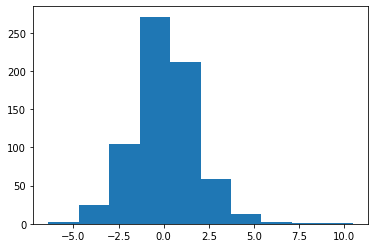

In [51]:
plt.hist(sec_dpc, bins=10)

(array([  3.,   5.,   6.,  38., 213., 328.,  79.,  24.,   7.,   6.]),
 array([-21.06282614, -16.96705724, -12.87128834,  -8.77551943,
         -4.67975053,  -0.58398163,   3.51178728,   7.60755618,
         11.70332508,  15.79909399,  19.89486289]),
 <a list of 10 Patch objects>)

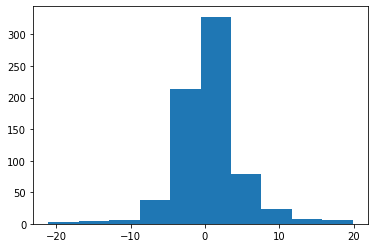

In [52]:
plt.hist(tsla_dpc, bins=10)

In [53]:
sec_dpc_cs = sec_dpc.cumsum() #누적합

In [55]:
tsla_dpc_cs = tsla_dpc.cumsum() #누적합

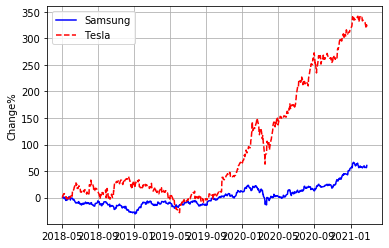

In [56]:
plt.plot(sec.index, sec_dpc_cs, 'b', label="Samsung")
plt.plot(tsla.index, tsla_dpc_cs, 'r--', label="Tesla")
plt.ylabel('Change%')
plt.grid(True)
plt.legend(loc='best')
plt.show()